<a href="https://colab.research.google.com/github/ejini6969/Optimization-Deep-Learning-ODL-/blob/main/MLR_exercise_code(Lab_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0, 5.0)

In [3]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [6]:
path = '/drive/MyDrive/boston.csv'

In [7]:
#path = boston.csv
data = pd.read_csv(path)
data.head()

# Many continuous independent variable --> multiple linear regression

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.shape

(506, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
corr = data.corr(method = 'pearson')
corr

# usage of correlation: understand strength of relationship between independent and target response variable.
# Output: correlation matrix ("pearson" for continuous, "kendall" for mixture of continuous and categorical, "spearman" for categorical or nominal)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

# diagonal is always 1.0, because it compares with itself. (upper triangle is symmetrical with lower triangle)
# range of correlation: -1 to 1 (weak correlation between price and CRIM: 0.39)

<ipython-input-11-6b86d9a48e85>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.40,-0.06,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.62,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Identify the 2 highest correlation and explain.

The highest correlation is between Price and LSTAT (-0.74), whereas 2nd highest correlation is between Price and RM (0.70). A small change in LSTAT will decrease the price drastically as indicated by the negative correlation. Whilst a small change in RM will increase the price drastically as indicated by the positive correlation.

In [12]:
# Target (dependent variable) and features (independent variables)
Y = data["PRICE"]
X = data.drop("PRICE", axis = 1)

# can drop weak-correlated attributes (optional)

In [13]:
X.LSTAT

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

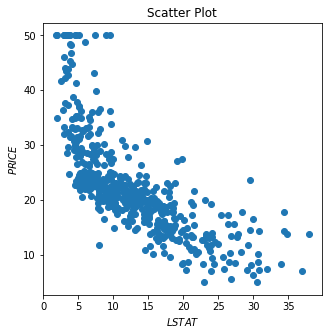

In [14]:
# Must only have 1 or 2 feature variables to draw scatter plot (use multiple scatter plots)

# Plot Scatter Plot between LSTAT and PRICE
plt.scatter(X.LSTAT, Y)
plt.xlabel("$LSTAT$")
plt.ylabel("$PRICE$")
plt.title("Scatter Plot")
plt.show()
# Diagram shows as LSTAT increases, price decreases. 

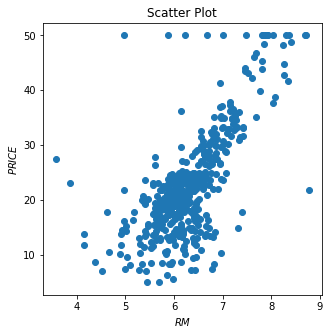

In [15]:
# Plot Scatter Plot betweenRM and PRICE
plt.scatter(X.RM, Y)
plt.xlabel("$RM$")
plt.ylabel("$PRICE$")
plt.title("Scatter Plot")
plt.show()
# Diagram shows as RM increases, price increases. Variation in plot with several dots scattered loosely when price is relatively low or high

In [16]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

(354, 13) (152, 13) (354,) (152,)


In [18]:
# Normalization
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# fit() : compute mean and standard deviation
# transform(): modify existing data using the new computed value of fit(), output: sparse matrix / array
# fit_transform(): more efficient by simultaneously computing and modifying existing data features, output: sparse matrix / array

In [24]:
# Linear Regression model

# coef_: compute slope of equation
# R-squared: how good are the feature variables contributing to the target response variable. (Higher R-squared, greater impact)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, Y_train)

# To calculate the R squared
R1 = model.score(X_test, Y_test)
print("R-squared: %.4f" %R1)

print("Intercept (b0):", model.intercept_)
print("slope (b1):", model.coef_) # gives slope for each feature variable that is not dropped

Y_pred = model.predict(X_test)

# Find the mean square error (between actual && prediction)
MSE = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error: %.2f" %MSE)


R-squared: 0.6735
Intercept (b0): 22.7454802259887
slope (b1): [-0.99884541  1.04926169  0.08283818  0.61938203 -1.87828363  2.69828142
 -0.27592019 -3.09716434  2.09139628 -1.88530946 -2.26382523  0.59446503
 -3.45020002]
Mean Squared Error: 27.18


## Interpret the R-squared

Around 67.35% variation of the house price can be explained by all the independent feature variables. 

OR

67.35% of independent feature variables can be used to explain the variation of house price. 

## Interpret the b0

The average house price is around 22.75 thousand with no influence from the feature variables. Cannot be negative values because house price is always > 0.

## Interpret b1

A 1 unit increase in CRIM will decrease the house price by 0.99884541. (determine the tendency and degree of increase or decrease of house price)

## Interpret MSE

The lower MSE, the better the model. No specific scaling for MSE. Moderate model with an error rate of 27.18%.

In [25]:
# Loss function: by default --> squared_error
# penalty: regularization terms
# maximum iteration (default: 1000)
# tolerance value: stopping criteria (by-default small)
# SGD shuffle dataset before training models

# Stochastic Gradient Decent (SGD) for Linear Regression (can only be applied for Linear Regression)
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
model2 = SGDRegressor(random_state = 0)
model2.fit(X_train, Y_train)

# To calculate the R squared
R2 = model2.score(X_test, Y_test)
print("R-squared: %.4f" %R2)

print("Intercept (b0):", model2.intercept_)
print("slope (b1):", model2.coef_) # gives slope for each feature variable that is not dropped

Y_pred2 = model2.predict(X_test)

# Find the mean square error (between actual && prediction)
MSE = mean_squared_error(Y_test, Y_pred2)
print("Mean Squared Error: %.2f" %MSE)

R-squared: 0.6697
Intercept (b0): [22.75762872]
slope (b1): [-0.89496058  0.87199153 -0.16338715  0.67721088 -1.61811365  2.82388151
 -0.31255792 -2.93842911  1.3564319  -1.10720515 -2.23221127  0.57618341
 -3.3832464 ]
Mean Squared Error: 27.51
